## Flight Fare Prediction Project Life Cycle

- Business Problem UnderStanding
- Data Collection
- Data Pre-Processing
- Exploratary Data Analysis
- Model Selection
- Model Training 
- Model Evaluation & Fine Tuning
- Model Deployment
- Model Monitoring & Maintainance

### Business Problem UnderStanding
Flight fare is determine dynamically by airlines and it depends on various factor like:
- Flight Duration
- Demand
- No of stops
- Route
- No of days in advance the booking is made
- Time of Departure & Arrival

We need to create a model, which can predict the flight fare given its parameters.


### Data Collection
Link: https://drive.google.com/file/d/1n9FqH3D1-nvviwvktEZeW4cgEPacGuRe/view?usp=sharing

In [2]:
# Importing the Liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Fetching the data
data = pd.read_csv('C:\Work\YouTube\ML\Flight_Fare_Prediction\Flight_Data.csv', low_memory = False)
data.head(2)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,date
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,01-01-2018
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,02-01-2018


In [3]:
data.tail()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,date
301201,1300218,Vistara,UK-747,Delhi,Early_Morning,one,Night,Mumbai,Economy,113.83,1,14985,15-03-2018
301202,1300219,Air_India,AI-512,Delhi,Afternoon,one,Night,Mumbai,Economy,97.58,1,14670,16-03-2018
301203,1300220,Air_India,AI-537,Delhi,Evening,one,Morning,Mumbai,Economy,115.83,1,15195,17-03-2018
301204,1300221,Vistara,UK-977,Delhi,Evening,zero,Night,Mumbai,Economy,622.25,1,15720,18-03-2018
301205,1300222,Vistara,UK-809,Delhi,Evening,one,Night,Mumbai,Economy,124.42,1,15983,19-03-2018


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301206 entries, 0 to 301205
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        301206 non-null  int64  
 1   airline           300754 non-null  object 
 2   flight            301206 non-null  object 
 3   source_city       301206 non-null  object 
 4   departure_time    301206 non-null  object 
 5   stops             301206 non-null  object 
 6   arrival_time      301206 non-null  object 
 7   destination_city  301206 non-null  object 
 8   class             301006 non-null  object 
 9   duration          300956 non-null  float64
 10  days_left         301206 non-null  int64  
 11  price             301106 non-null  object 
 12  date              358 non-null     object 
dtypes: float64(1), int64(2), object(10)
memory usage: 29.9+ MB


In [5]:
# Creating a copy of data
df = data.copy()

In [6]:
df.head(2)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,date
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,01-01-2018
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,02-01-2018


In [7]:
# Checking duplicate entrie
df_duplicate = df[df.duplicated()]
df_duplicate

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,date


In [8]:
# checking the null column
null_values = df.isnull().sum()
null_values

null_value_percentage = (null_values/df.shape[0]) * 100
null_value_percentage

df_null = pd.DataFrame({'Null_Count':null_values, 'Null_Percentage': null_value_percentage})
df_null

,Null_Count,Null_Percentage
Unnamed: 0,0,0.000000
airline,452,0.150063
flight,0,0.000000
source_city,0,0.000000
departure_time,0,0.000000
stops,0,0.000000
arrival_time,0,0.000000
destination_city,0,0.000000
class,200,0.066400
duration,250,0.083000


In [9]:
all_column = df.columns
all_column

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price', 'date'],
      dtype='object')

In [10]:
# Numeric Column
numeric_column = df.select_dtypes(include = 'number').columns
numeric_column

Index(['Unnamed: 0', 'duration', 'days_left'], dtype='object')

In [11]:
# Object column
object_column = df.select_dtypes(include = 'object').columns
object_column

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'price', 'date'],
      dtype='object')

### Handling the data
- We need to drop 'Unnamed: 0', 'date' columns.
- We need to drop the null values on 'airline' column.
- We need to change 'departure_time' column from object to numeric.
- We need to change 'arrival_time' column from object to numeric.
- We need to change 'class' column from object to numeric & also drop the nan value.
- We need to drop the null values on 'duration' column.
- We need to drop the null values on 'price' column & change the datatype.

### Data Cleaning

In [12]:
# Dropping the Unnamed:0 & date column
df.drop(['Unnamed: 0','date'], axis = 1, inplace = True)

In [13]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [14]:
# Converting the datatype into object to numeric 'price' column
df['price'] = pd.to_numeric(df['price'], errors = 'coerce')
df['price'].dtypes

dtype('float64')

In [15]:
# Dropping the null values on airline column
df = df.dropna()
df.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [16]:
df.shape

(300204, 11)

In [17]:
# Function to convert time in decimal to minutes
def time_minute(t):
    i = t//1
    f = round(t%1, 2)
    time = i*60 + f*100
    return time
    

In [18]:
df['duration_minute'] = df['duration'].apply(time_minute)
df['duration_minute']

0           137.0
1           153.0
2           137.0
3           145.0
4           153.0
           ...   
301201     6863.0
301202     5878.0
301203     6983.0
301204    37345.0
301205     7482.0
Name: duration_minute, Length: 300204, dtype: float64

In [19]:
# Dropping 'duration' columns
df.drop(columns = ['duration'], axis = 1, inplace = True)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price,duration_minute
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,1,5953.0,137.0
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,1,5953.0,153.0
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,1,5956.0,137.0
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,1,5955.0,145.0
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,1,5955.0,153.0


### Creating a column for routes

In [20]:
df['routes'] = df['source_city'] + '-' + df['destination_city']
df['routes'].value_counts()

Delhi-Mumbai           15340
Mumbai-Delhi           14809
Delhi-Bangalore        14012
Bangalore-Delhi        13756
Bangalore-Mumbai       12939
Mumbai-Bangalore       12885
Mumbai-Kolkata         12602
Delhi-Kolkata          11934
Kolkata-Mumbai         11467
Delhi-Chennai          10780
Kolkata-Delhi          10506
Mumbai-Hyderabad       10470
Mumbai-Chennai         10130
Hyderabad-Mumbai       10064
Bangalore-Kolkata      10028
Kolkata-Bangalore       9824
Chennai-Delhi           9783
Chennai-Mumbai          9338
Delhi-Hyderabad         9328
Bangalore-Hyderabad     8928
Hyderabad-Delhi         8506
Hyderabad-Kolkata       7987
Kolkata-Hyderabad       7897
Hyderabad-Bangalore     7854
Chennai-Kolkata         6983
Kolkata-Chennai         6653
Chennai-Bangalore       6493
Bangalore-Chennai       6410
Hyderabad-Chennai       6395
Chennai-Hyderabad       6103
Name: routes, dtype: int64

In [21]:
df.shape

(300204, 12)

### Outliers

In [22]:
df.describe()

,days_left,price,duration_minute
count,300204.000000,3.002040e+05,300204.000000
mean,26.000503,2.101474e+04,751.282058
std,13.563767,2.541873e+04,437.990613
min,1.000000,1.105000e+03,60.000000
25%,15.000000,4.783000e+03,427.750000
50%,26.000000,7.425000e+03,692.000000
75%,38.000000,4.252100e+04,985.000000
max,49.000000,2.512780e+06,37345.000000


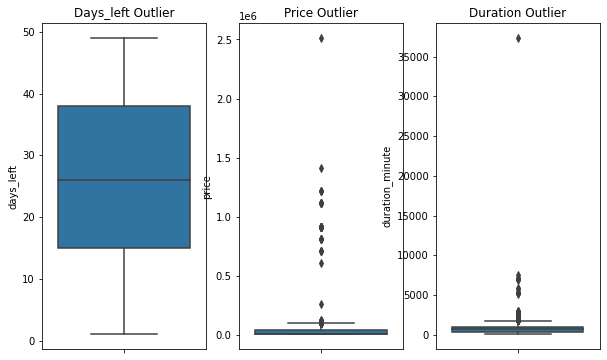

In [24]:
# Boxplot For Outlier Visualization
fig, ax = plt.subplots(1,3, figsize = (10, 6))

sns.boxplot(y = 'days_left', data = df, ax = ax[0])
ax[0].set_title("Days_left Outlier")

sns.boxplot(y = 'price', data = df, ax = ax[1])
ax[1].set_title("Price Outlier")

sns.boxplot(y = 'duration_minute', data = df, ax = ax[2])
ax[2].set_title("Duration Outlier")


plt.show()

#### Removing the outliers

In [25]:
# Quartile & limits
q1_price = np.quantile(df['price'], 0.25)
q3_price = np.quantile(df['price'], 0.75)
IQR_price = q3_price - q1_price

print('Quantile1: ', q1_price)
print('Quantile3: ', q3_price)
print('IQR: ', IQR_price)

# IQR_limits
lower_limit_price = q1_price - 1.5* IQR_price
upper_limit_price = q3_price + 1.5* IQR_price

print('lower_limit: ', lower_limit_price)
print('upper_limit: ', upper_limit_price)

Quantile1:  4783.0
Quantile3:  42521.0
IQR:  37738.0
lower_limit:  -51824.0
upper_limit:  99128.0


In [26]:
# Removing the outliers
df = df[(df['price']> lower_limit_price) & (df['price']< upper_limit_price)]

In [27]:
df.shape

(300041, 12)

In [28]:
# Quartile & limits for 'duration_minute' column
q1_duration_minute = np.quantile(df['duration_minute'], 0.25)
q3_duration_minute = np.quantile(df['duration_minute'], 0.75)
IQR_duration_minute = q3_duration_minute - q1_duration_minute

print('Quantile1: ', q1_duration_minute)
print('Quantile3: ', q3_duration_minute)
print('IQR: ', IQR_duration_minute)

# IQR_limits
lower_limit_duration_minute = q1_duration_minute - 1.5* IQR_duration_minute
upper_limit_duration_minute = q3_duration_minute + 1.5* IQR_duration_minute

print('lower_limit: ', lower_limit_duration_minute)
print('upper_limit: ', upper_limit_duration_minute)

Quantile1:  427.0
Quantile3:  985.0
IQR:  558.0
lower_limit:  -410.0
upper_limit:  1822.0


In [29]:
# Removing the outliers
df = df[(df['duration_minute']> lower_limit_duration_minute) & (df['duration_minute']< upper_limit_duration_minute)]

In [30]:
df.describe()

,days_left,price,duration_minute
count,297808.000000,297808.000000,297808.000000
mean,26.039737,20882.163276,741.590716
std,13.549020,22672.480332,419.345082
min,1.000000,1105.000000,60.000000
25%,15.000000,4757.000000,427.000000
50%,26.000000,7424.000000,685.000000
75%,38.000000,42521.000000,977.000000
max,49.000000,98972.000000,1817.000000


### Creating Duration minute slab

In [31]:
df['duration_slab'] = ['up to 2 hrs' if val <= 120 
                       else '2 to 5 hrs' if 120< val <= 300
                      else '5 to 12 hrs' if 300< val <= 720
                      else '12 to 24 hrs' if 720< val <= 1440
                      else 'more than 24 hrs'
                      for val in df['duration_minute']]
df['duration_slab'].value_counts()

5 to 12 hrs         116648
12 to 24 hrs        111491
2 to 5 hrs           35956
more than 24 hrs     27411
up to 2 hrs           6302
Name: duration_slab, dtype: int64

In [32]:
df.shape

(297808, 13)

### Cleaned Data 

In [33]:
# Saving the cleaned data
df.to_csv('C:\Work\YouTube\Flight_Fare_Prediction\cleaned_flight_data.csv', index = False)